<a href="https://colab.research.google.com/github/maleahjamieson/LittleLittleBear/blob/master/HW_3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

`get_random_data` takes in `w, b, mu, sigma, m` and outputs the random data in a list of 2 matrices, `labels` and `data`.

`data` contains the points to be plotted and `labels` contains the class label for each point in `data`.

In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = np.empty((m,2))
  labels = np.empty((m, 1), dtype=int)
  for i in range(m):
    #choose class label 0 or 1 with a 50/50 chance
    c = np.random.randint(0,2)

    #pick x_1 within [0,1)
    x_1 = np.random.random()

    #find noise n using mu and sigma
    n = np.random.default_rng().normal(mu, sigma)
    
    #get x_2
    x_2 = (w * x_1) + b + ((-1) ** c * n)
    
    #put these into the arrays
    data[i-1] = [x_1,x_2]
    labels[i-1] = c
  
  #print("data:\n" + str(data))
  #print("labels:\n" + str(labels))
  #display_random_data(labels, data)
  return [labels, data]


`display_random_data` takes 2 matrices `l` (the labels) and `d` (the data) and plots the data.

When `l == 0`, the point is <font color = 'blue'>blue</font> as it is above the line used to generate the data.

When `l == 1`, the point is <font color = 'red'>red</font> as it is below the line used to generate the data.

`d` contains the points to be plotted.

In [0]:
def display_random_data(l, d):
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  for i in range(d.shape[0]):
    if(l[i] == 0):
      plt.plot(d[i,0],d[i,1], "b.")
    else:
      plt.plot(d[i,0],d[i,1], "r.")

Below generates the random data and displays it.

The **black line** is the true line.

Here you can see the values I set for `w, b, mu, sigma, ` and ` m`.

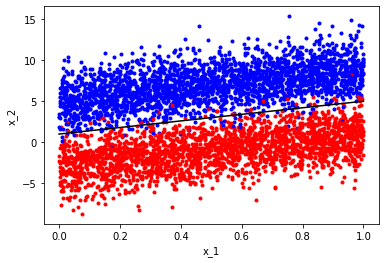

In [4]:
# w, b, mu, sigma, m
w = 4
b = 1
mu = 4
sigma = 2
m = 5000
random_data = get_random_data(w,b,mu,sigma,m)
labels = random_data[0]
data = random_data[1]
display_random_data(labels, data)

#this displays the actual line
x = np.linspace(0, 1, 2)
y = (w*x + b)
plt.plot(x,y, '-k')

#for debug purposes, print data array and labels
#print(data)
#print(labels)

Splitting the labels and data into training and test sets.
I split the data into 4000 training / 1000 test because 80% of 5000 is 1000.

In [0]:
#splitting into training and test sets
train_num = 4000
#xs are data, ys are labels
train_xs = data[:train_num, :]
test_xs = data[train_num:, :]

train_ys = np.asarray(labels[:train_num])
test_ys = np.asarray(labels[train_num:])
#print(test_ys)

#Problem 2

Linear Regression using Keras

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import models
from tensorflow.keras import layers

Building and Compiling the Keras Model.

Here I used a Dense layer with sigmoid activation with an input dimension of 2 (due to the data being 2 dimensions) and an output dimension of 1.

When training the model, I used 40 epochs with a batch size of 100.

I get the weights and bias using the `get_weights()` function and print them so I could see their values.

In [7]:
#Building and Compiling Keras model
network = models.Sequential()
network.add(layers.Dense(1, activation='sigmoid', input_dim=2))
network.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=["accuracy"])

#Training model
network.fit(train_xs, train_ys, epochs=40, batch_size=100)

#getting the weights
weights, bias = network.layers[0].get_weights()
print(weights)
print(bias)

Epoch 1/40
40/40 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.7680
Epoch 2/40
40/40 [==============================] - 0s 946us/step - loss: 0.4473 - accuracy: 0.7768
Epoch 3/40
40/40 [==============================] - 0s 965us/step - loss: 0.4199 - accuracy: 0.7878
Epoch 4/40
40/40 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.7977
Epoch 5/40
40/40 [==============================] - 0s 1ms/step - loss: 0.3726 - accuracy: 0.8092
Epoch 6/40
40/40 [==============================] - 0s 975us/step - loss: 0.3526 - accuracy: 0.8213
Epoch 7/40
40/40 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8315
Epoch 8/40
40/40 [==============================] - 0s 1ms/step - loss: 0.3187 - accuracy: 0.8418
Epoch 9/40
40/40 [==============================] - 0s 1ms/step - loss: 0.3044 - accuracy: 0.8528
Epoch 10/40
40/40 [==============================] - 0s 1ms/step - loss: 0.2916 - accuracy: 0.8635
Epoch 11/40
4

Evaluating the model and predicting the ys.

In [8]:
network.evaluate(test_xs, test_ys)

32/32 [==============================] - 0s 1ms/step - loss: 0.1457 - accuracy: 0.9530


[0.14566722512245178, 0.953000009059906]

In [0]:
pred_ys = network.predict(test_xs)

Below is the graph of the results of my model.
The <font color = 'blue'>blue</font> and <font color = 'red'>red</font> dots are the test data.

The <font color = 'green'>green line </font> is the true line, found using the data from problem one. The equation for this is:

$x_2 = (w * x_1) + b$

The **black line** is the separating line, found using the formula:

$x_2 = (-(w_1 * x_1) + b )/ w_2$

where $w_1$ and $w_2$ are the weights and $b$ is the bias, both found in the **Building and Compiling the Keras Model** code cell.

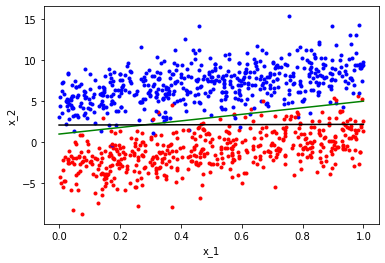

In [10]:
#display the test data
display_random_data(test_ys, test_xs)
#display_random_data(labels, data)

#display the true line
x = np.linspace(0, 1, 2)
true = (w*x + b)
plt.plot(x,true, '-g')

#display the separating line
pred = (-((weights[0] * x) + bias) / weights[1])
plt.plot(x, pred, '-k')

#Problem 3

Use numpy to implement a logistic regression model from scratch and train with the data generated in problem 1.

In [11]:
#epoch number, same as above
epochs = 40

#learning rate
lr = 0.01

#initial value for weight and bias
w_i = np.random.randn(1)
b_i = np.zeros(1)
print(w_i)
print(b_i)

[0.04515342]
[0.]


Linear regression using stochastic gradient descent

In [12]:
predictions = list()
for epoch in np.arange(epochs):
  #shuffling the points
  shuffle = np.random.permutation(m)
  x_shuffled = data[shuffle]
  y_shuffled = labels[shuffle]

  for i in np.arange(m):
    xi = x_shuffled[i:i+1,0]
    yi = x_shuffled[i:i+1,1]
    y_pred = w_i * xi + b_i
    grad_w = xi * (xi * w_i - yi)
    grad_b = (y_pred - yi)
    predictions.append(y_pred)
    w_i -= lr * grad_w
    b_i -= lr * grad_b
print(w_i)
print(b_i)

[5.61684106]
[0.46060785]


Calculating loss with the sum of squares



In [13]:
loss = 0
for i in np.arange(1000):
  loss += 0.5 ** (w_i * test_xs[i,0] + b_i - test_xs[i,1]) ** 2
loss /= 1000

print(loss)

[0.07275038]


Below is the graph of the results of my model.
The <font color = 'blue'>blue</font> and <font color = 'red'>red</font> dots are the test data.

The <font color = 'green'>green line </font> is the true line, found using the data from problem one. The equation for this is:

$x_2 = (w * x_1) + b$

The **black line** is the separating line, found using the formula:

$pred = (w_i * x) + b_i)$

where $w_i$ is the weight and $b$ is the bias, both found in the **linear regression** code cell.

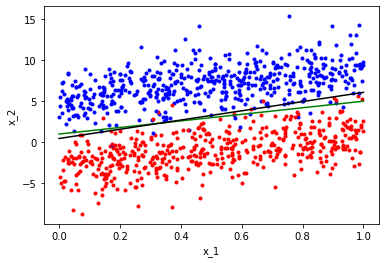

In [14]:
#display the random test data
display_random_data(test_ys, test_xs)
#display_random_data(labels, data)

#display the true line
x = np.linspace(0, 1)
true = (w*x + b)
plt.plot(x,true, '-g')

#display the separating line
np_pred = ((w_i * x) + b_i)
plt.plot(x, np_pred, '-k')

#Sources

###Random:

https://docs.scipy.org/doc/numpy-1.17.0/reference/random/generated/numpy.random.Generator.normal.html

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

###Plotting:
https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html

http://chris35wills.github.io/courses/PythonPackages_matplotlib/matplotlib_scatter/

###Numpy Arrays:

https://thispointer.com/python-numpy-select-rows-columns-by-index-from-a-2d-ndarray-multi-dimension/

###Linear regression using Keras:

https://keras.io/

https://keras.io/metrics/

https://github.com/schneider128k/machine_learning_course/blob/master/keras_basics.md

https://github.com/schneider128k/machine_learning_course/blob/master/linear_regression_keras.ipynb

https://keras.io/getting-started/sequential-model-guide/

###Linear regression using numpy:

https://github.com/schneider128k/machine_learning_course/blob/master/linear_regression_simple_numpy_implementation.ipynb

###Gradient Descent

https://www.youtube.com/watch?v=sDv4f4s2SB8

https://github.com/schneider128k/machine_learning_course/blob/master/linear_regression_gradient_descent.ipynb